# **Statistical Applications - Linear and Logistic Regression**

This notebook covers fundamental methods and evaluation metrics used in risk analytics, including Linear Regression, Logistic Regression, and visualization of evaluation metrics such as ROC and Precision-Recall curves.





### **1. Linear Regression**
Linear regression is a statistical method used to model the relationship between a dependent variable (e.g., credit default) and one or more independent variables (e.g., credit score, income, debt-to-income ratio).


Linear regression aims to find the best-fitting line through the data points. The equation of the line is:
$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n + \epsilon $
where \( Y \) is the dependent variable, $X_1, X_2, \ldots, X_n $ are the independent variables, $ \beta_0, \beta_1, \ldots, \beta_n $ are the coefficients, and $\epsilon $ is the error term.


In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {
    'credit_score': [700, 750, 650, 800, 720],
    'income': [50000, 60000, 45000, 70000, 55000],
    'default': [0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Independent variables
X = df[['credit_score', 'income']]
X = sm.add_constant(X)  # Add a constant to the model (intercept)

y = df['default']  # Dependent variable

# Fit the LinReg model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns[1:]  # Exclude the constant term
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]

print("\nVariance Inflation Factor (VIF) values:")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                 -0.815
Method:                 Least Squares   F-statistic:                    0.1019
Date:                Mon, 25 Aug 2025   Prob (F-statistic):              0.908
Time:                        01:15:44   Log-Likelihood:                -3.2843
No. Observations:                   5   AIC:                             12.57
Df Residuals:                       2   BIC:                             11.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -7.4136     18.574     -0.399   

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "




#### Model Summary
- **Dep. Variable**: `default`
- **R-squared**: 0.092
- **Adj. R-squared**: -0.815
- **F-statistic**: 0.1019
- **Prob (F-statistic)**: 0.908
- **Log-Likelihood**: -3.2843
- **AIC**: 12.57
- **BIC**: 11.40
- **No. Observations**: 5
- **Df Residuals**: 2
- **Df Model**: 2
- **Covariance Type**: nonrobust

#### Coefficients
- **const**: -7.4136
  - **std err**: 18.574
  - **t**: -0.399
  - **P>|t|**: 0.728
  - **95% Confidence Interval**: [-87.332, 72.505]
- **credit_score**: 0.0183
  - **std err**: 0.046
  - **t**: 0.399
  - **P>|t|**: 0.728
  - **95% Confidence Interval**: [-0.179, 0.216]
- **income**: -9.738e-05
  - **std err**: 0.000
  - **t**: -0.364
  - **P>|t|**: 0.750
  - **95% Confidence Interval**: [-0.001, 0.001]

#### Diagnostic Statistics
- **Omnibus**: nan
- **Prob(Omnibus)**: nan
- **Durbin-Watson**: 2.408
- **Jarque-Bera (JB)**: 0.646
- **Prob(JB)**: 0.724
- **Skew**: 0.165
- **Kurtosis**: 1.271
- **Cond. No.**: 3.19e+06

### Interpretation

**R-squared (0.092)**:
   - The R-squared value indicates that approximately 9.2% of the variance in the dependent variable (`default`) is explained by the independent variables (`credit_score` and `income`). This is quite low, suggesting that the model does not fit the data well.

 **Adj. R-squared (-0.815)**:
   - The adjusted R-squared value is negative, which is unusual and indicates a poor fit of the model. This can happen when the model includes too many predictors relative to the number of observations.

**F-statistic (0.1019) and Prob (F-statistic) (0.908)**:
   - The F-statistic tests the overall significance of the model. A high p-value (0.908) indicates that the model is not statistically significant.

 **Coefficients**:
   - **Intercept (const)**: The intercept is -7.4136, but with a high standard error (18.574) and a p-value of 0.728, it is not statistically significant.
   - **credit_score**: The coefficient for `credit_score` is 0.0183, but with a p-value of 0.728, it is not statistically significant.
   - **income**: The coefficient for `income` is -9.738e-05, but with a p-value of 0.750, it is not statistically significant.

 **Diagnostic Statistics**:
   - **Durbin-Watson (2.408)**: This statistic tests for the presence of autocorrelation in the residuals. A value close to 2 suggests no autocorrelation.
   - **Jarque-Bera (JB) (0.646) and Prob(JB) (0.724)**: These statistics test for normality of the residuals. A high p-value (0.724) suggests that the residuals are normally distributed.
   - **Cond. No. (3.19e+06)**: The condition number is very high, indicating strong multicollinearity or other numerical problems. This suggests that the independent variables are highly correlated, which can make the model unstable.

**VIF** > 10: indicates multicolinearity between credit_score and income.

### **Explanation:**

### 1. R-squared ($ R^2 $)
R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

#### Formula
$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $
where:
- $ SS_{res} $ is the sum of squares of residuals.
- $ SS_{tot} $ is the total sum of squares.

#### Interpretation
In the results, $ R^2 = 0.092 $, indicating that 9.2% of the variance in the `default` variable is explained by the `credit_score` and `income` variables.

### 2. Adjusted R-squared ($ \bar{R}^2 $)
Adjusted R-squared adjusts the R-squared value based on the number of predictors in the model.

#### Formula
$ \bar{R}^2 = 1 - \left( \frac{1 - R^2}{n - k - 1} \right) \times (n - 1) $
where:
- $ n $ is the number of observations.
- $ k $ is the number of predictors.

#### Interpretation
In the results, $ \bar{R}^2 = -0.815 $, which is unusual and indicates a poor fit of the model. This can happen when the model includes too many predictors relative to the number of observations.

### 3. F-statistic
The F-statistic tests the overall significance of the model.

#### Formula
$ F = \frac{(SS_{reg} / k)}{(SS_{res} / (n - k - 1))} $
where:
- $ SS_{reg} $ is the regression sum of squares.
- $ k $ is the number of predictors.
- $ n $ is the number of observations.

#### Interpretation
In the results, $ F = 0.1019 $ with a p-value of 0.908, indicating that the model is not statistically significant.

### 4. t-test
The t-test is used to determine if the coefficients are significantly different from zero.

#### Formula
$ t = \frac{\hat{\beta}_i}{SE(\hat{\beta}_i)} $
where:
- $ \hat{\beta}_i $ is the estimated coefficient.
- $ SE(\hat{\beta}_i) = \sqrt{\frac{\sigma^2}{ \sum_{j=1}^{n} (x_{ji} - \bar{x}_i)^2 }} $  is the standard error of the coefficient.The formula, where:
  - $ \sigma^2 $ is the variance of the error term.
  - $ x_{ji} $ are the values of variable $ X_i $.
  - $ \bar{x}_i $ is the mean of variable $ X_i $.

In the context of hypothesis testing for the coefficients in a linear regression model, the null hypothesis $H_0$ is that the coefficient $\beta_i = 0$.

A p-value greater than 0.05 indicates that there is not enough evidence to reject the null hypothesis. In other words, the coefficient is not statistically significant at the 5% significance level. This means that the independent variable does not have a significant effect on the dependent variable.


#### Interpretation of t-test results:
For `credit_score`, the t-statistic is 0.399 with a p-value of 0.728 is greater than 0.05, which indicates that there is not enough evidence to reject H0 ie. the coefficient of this independent variable is not statistically significant. This means that `credit_score` does not have a significant effect on the dependent variable.

Similarly, for `income`, the t-statistic is -0.364 with a p-value of 0.750 greater than 0.05, also indicating `income`does not have a significant effect on the dependent variable.

### 5. Linear Regression Assumptions and Durbin-Watson Statistic

#### Linear Regression Assumptions
1. **Linearity**: The relationship between the independent variables and the dependent variable is linear.
2. **Independence**: The observations are independent of each other.
3. **Homoscedasticity**: The variance ($ \sigma^2 $) of the error terms  is constant across all levels of the independent variables.
4. **Normality**: The error terms are normally distributed.



####  Durbin-Watson Statistic

The Durbin-Watson statistic tests for the presence of autocorrelation in the residuals.
The formula:
$ DW = \frac{\sum_{t=2}^{n} (e_t - e_{t-1})^2}{\sum_{t=1}^{n} e_t^2} $, where $ e_t $ are the residuals.

#### Interpretation of DW values
- $DW \approx 2 $: No autocorrelation.
- $DW \approx 0 $: Positive autocorrelation.
- $ DW \approx 4$: Negative autocorrelation.


In the OLS results, $ DW = 2.408 $, suggesting no autocorrelation in the residuals.

### 6. Jarque-Bera Test
The Jarque-Bera test checks whether the sample data have the skewness and kurtosis matching a normal distribution. The formula
$ JB = \frac{n}{6} \left( S^2 + \frac{(K - 3)^2}{4} \right) $
where:
- $ n $ is the number of observations.
- $ S $ is the sample skewness.
- $ K $ is the sample kurtosis.


#### Interpretation

The null hypothesis for the Jarque-Bera test is:
H0​:The data are normally distributed.

Here, the sample data refer to the residuals of the regression model (not the independent variables). The JB test checks if the residuals follow a normal distribution, which is one of the assumptions of Linear Regression (see assumption 4)

In the OLS results, $ JB = 0.646 $ with a p-value of 0.724 > 0.05 implies there is not enough evidence to reject H0 i.e., the data are normally distributed. This suggests that the residuals are normally distributed.

#### Interpretation of skewness and kurtosis
- **Skew:** S = 0.165 indicates that the distribution of the residuals is slightly skewed but close to zero, suggesting near-symmetry.
- **Kurtosis:** K = 1.271 implies that Excess Kurtosis $K - 3 = -1.729 $.This indicates that the distribution has lighter tails (fewer outliers) than a normal distribution.

Note: while K=1.271 is not close to 3, the overall interpretation from the Jarque-Bera test suggests that the residuals are reasonably close to a normal distribution for practical purposes in Linear Regression analysis.



### 7. Multicoliniarity with Condition Number
The condition number indicates the presence of multicollinearity in the model.

The condition number is the ratio of the largest eigenvalue to the smallest eigenvalue of the matrix $ X^TX $, where $ X $ is the design matrix.

#### Interpretation
In the results, the condition number is $ 3.19 \times 10^6 $, which is very high, indicating strong multicollinearity or other numerical problems.


### VIF is another measure used to detect multicollinearity.

VIF quantifies how much the variance of a regression coefficient is inflated due to multicollinearity with other predictors. However, VIF is not directly provided in the standard output of OLS regression results from libraries like statsmodels in Python.  You need to calculate it separately (see code below).

The formula:
$VIF_i = \frac{1}{1 - R_i^2}$, where:
$R_i^2$ is the R-squared value obtained by regressing the  i-th predictor, $X_i$, on all other predictors.

When to Use VIF?
- **Before Model Building**: To check for multicollinearity among predictors before fitting the model.
- **Model Diagnostics**: To diagnose multicollinearity issues in an already fitted model.
- **Model Improvement**: To decide which predictors to keep or remove to improve the model's stability and interpretability.

### Interpretation of VIF results:
- **VIF for `credit_score`**: 48.506806
- **VIF for `income`**: 48.506806

- **VIF = 1**: No correlation between the predictor and the other predictors.
- **VIF > 1**: Some correlation exists.
- **VIF > 5**: High correlation (indicates high multicollinearity).
- **VIF > 10**: Very high correlation (indicates severe multicollinearity).


In this case, both `credit_score` and `income` have VIF values of approximately 48.5, which is much higher than 10. This indicates severe multicollinearity between these 2 predictors.

### Implications
- High multicollinearity can make the regression coefficients highly sensitive to small changes in the data, leading to unreliable estimates.
- It becomes difficult to interpret the individual effects of `credit_score` and `income` on the dependent variable `default` because their effects are confounded.
- Model Instability: The model may not generalize well to new data because the high correlation between predictors can lead to overfitting.


### 8. Akaike Information Criterion (AIC)

AIC is used for model selection, providing a measure of the relative quality of statistical models for a given set of data.

AIC balances the goodness of fit of the model with the complexity of the model(number of parameters). A model with more parameters will fit the data better but may overfit, while a model with fewer parameters may underfit.

The AIC formula: $AIC = 2k - 2\ln(L)$
where, k is the number of parameters in the model, and L the likelihood of the model.

- Lower AIC Values indicate a better model.


### Bayesian Information Criterion (BIC)

BIC is also used for model selection, similar to AIC, but BIC imposes a stronger penalty for models with more parameters compared to AIC, making it more conservative in selecting models with fewer parameters.

BIC is based on the Bayesian probability framework. The BIC formula:

$ BIC = k \ln(n) - 2\ln(L)$
where k is the number of parameters in the model, n the number of observations, and L  the likelihood of the model.

- Lower BIC Values indicate a better model.


### Comparison of AIC and BIC

- **AIC**: Favors models with more parameters, especially when the sample size is large.
- **BIC**: Favors models with fewer parameters, especially when the sample size is large. It is more conservative and tends to select simpler models.

#### Interpretation of AIC & BIC results:

- **AIC = 12.57**: This value suggests that the model has a moderate fit to the data, considering the number of parameters.
- **BIC = 11.40**: This value is slightly lower than the AIC, indicating that the model is relatively simple and has a good fit to the data.


### Degrees of Freedom in Linear Regression

In a linear regression model, the degrees of freedom are used to describe the number of independent pieces of information that go into estimating a parameter. There are two main types of degrees of freedom in regression analysis: Df Model (Degrees of Freedom for the Model) and Df Residuals (Degrees of Freedom for the Residuals).

- Df Model $= k$ - the number of predictors (independent variables) in the model. In this case, DF Model = 2 indicates that there are 2 predictors in the model credit_score and income.

- Df Residuals $= n−k−1$, where n = the number of observations. In this case, DF Residuals = 2 indicates that there are 2 degrees of freedom for the residuals, which is the number of observations (5) minus the number of parameters estimated (2 predictors + 1 intercept).





### What to Do Next based on the VIF results and OLS analysis

1. **Remove One of the Predictors**: If `credit_score` and `income` are highly correlated, consider removing one of them from the model. You can decide which one to keep based on domain knowledge or additional analysis.
2. **Combine Predictors**: If both predictors are important, consider creating a composite variable that combines them in a meaningful way.
3. **Regularization**: Use regularization techniques like Ridge Regression or Lasso Regression, which can handle multicollinearity by penalizing large coefficients.
4. **Principal Component Analysis (PCA)**: Use PCA to transform the predictors into a set of uncorrelated components, which can then be used in the regression model.

### **Let's remove One Predictor & Re-fit the model**


We'll remove `income` and refit the model to see if the VIF values improve:



In [4]:
# Remove 'income' from the independent variables
X_reduced = df[['credit_score']]
X_reduced = sm.add_constant(X_reduced)  # Add a constant to the model (intercept)

# Fit the reduced model
model_reduced = sm.OLS(y, X_reduced).fit()

# Print the summary of the reduced model
print(model_reduced.summary())

# Calculate VIF for the reduced model
vif_data_reduced = pd.DataFrame()
vif_data_reduced["feature"] = X_reduced.columns[1:]  # Exclude the constant term
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(1, X_reduced.shape[1])]

print("\nVariance Inflation Factor (VIF) values for the reduced model:")
print(vif_data_reduced)

                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.290
Method:                 Least Squares   F-statistic:                   0.09986
Date:                Mon, 25 Aug 2025   Prob (F-statistic):              0.773
Time:                        01:40:35   Log-Likelihood:                -3.4450
No. Observations:                   5   AIC:                             10.89
Df Residuals:                       3   BIC:                             10.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8722      4.035     -0.216   

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Interpretation of Results

VIF= 1.0 indicates that there is no multicollinearity for the credit_score variable. This means that credit_score is not correlated with any other predictors in the model (in this case, there are no other predictors).


## Next, recalculating AIC and BIC

Now, let's refit the model with only credit_score as the predictor and recalculate the AIC and BIC values.

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Sample data
data = {
    'credit_score': [700, 750, 650, 800, 720],
    'income': [50000, 60000, 45000, 70000, 55000],
    'default': [0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Independent variable
X = df[['credit_score']]
X = sm.add_constant(X)  # Add a constant to the model (intercept)

y = df['default']  # Dependent variable

# Fit the LinReg model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Calculate AIC and BIC
aic = model.aic
bic = model.bic

print(f"AIC: {aic}")
print(f"BIC: {bic}")


                            OLS Regression Results                            
Dep. Variable:                default   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                 -0.290
Method:                 Least Squares   F-statistic:                   0.09986
Date:                Mon, 25 Aug 2025   Prob (F-statistic):              0.773
Time:                        01:49:59   Log-Likelihood:                -3.4450
No. Observations:                   5   AIC:                             10.89
Df Residuals:                       3   BIC:                             10.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8722      4.035     -0.216   

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


### Interpretation of the new AIC and BIC values and compare them with the previous model to make a decision on model selection.

### New AIC and BIC Values
- **AIC**: 10.89
- **BIC**: 10.11

### Previous AIC and BIC Values
- **AIC**: 12.57
- **BIC**: 11.40


#### AIC Comparison
- **Previous Model (with `credit_score` and `income`)**: AIC = 12.57
- **Current Model (with only `credit_score`)**: AIC = 10.89

The current model has a lower AIC value (10.89) compared to the previous model (12.57). This suggests that the current model has a better fit considering the number of parameters.

#### BIC Comparison
- **Previous Model (with `credit_score` and `income`)**: BIC = 11.40
- **Current Model (with only `credit_score`)**: BIC = 10.11

The current model also has a lower BIC value (10.11) compared to the previous model (11.40). This suggests that the current model is simpler and has a better fit to the data.

### Conclusion

Based on both AIC and BIC, the current model (with only `credit_score` as the predictor) is the better model. It has the lowest AIC and BIC values, indicating a better balance between goodness of fit and model complexity.

### Summary
- **AIC**: The current model has a lower AIC value (10.89) compared to the previous model (12.57), indicating a better fit considering the number of parameters.
- **BIC**: The current model has a lower BIC value (10.11) compared to the previous model (11.40), indicating a simpler model with a better fit to the data.
- **Model Selection**: Choose the model with the lowest AIC and BIC values. In this case, the model with only `credit_score` is the better model.

By following these steps, we can systematically select the best model based on AIC and BIC values. In this example, the model with only `credit_score` is preferred because it has the lowest AIC and BIC values, indicating a better fit and simpler structure.

##**2.Logistic Regression**

Logistic regression can be used to model the probability of a binary outcome based on one or more predictor variables. In the context of credit risk, the binary outcome could be whether a borrower defaults on a loan (1) or not (0).

In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

# Suppress specific warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# Sample data
data = {
    'credit_score': [700, 750, 650, 800, 720],
    'income': [50000, 60000, 45000, 70000, 55000],
    'employment_status': ['employed', 'unemployed', 'employed', 'employed', 'unemployed'],
    'default': [0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Convert categorical variable to dummy/indicator variables
df['employment_status'] = df['employment_status'].astype('category')
df = pd.get_dummies(df, columns=['employment_status'], drop_first=True)

# Ensure all variables are numerical
df = df.astype(float)

# Independent variables
X = df[['credit_score', 'income', 'employment_status_unemployed']]
X = sm.add_constant(X)  # Add a constant to the model (intercept)

# Dependent variable
y = df['default']

# Fit the Logistic Regression model
model = sm.Logit(y, X).fit()

# Print the summary
print(model.summary())

# Calculate AIC and BIC
aic = model.aic
bic = model.bic

print(f"AIC: {aic}")
print(f"BIC: {bic}")

# Chi-square test for the categorical variable
chi2 = model.pvalues['employment_status_unemployed']
print(f"Chi-square p-value for employment_status: {chi2}")


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                    5
Model:                          Logit   Df Residuals:                        1
Method:                           MLE   Df Model:                            3
Date:                Mon, 25 Aug 2025   Pseudo R-squ.:                   1.000
Time:                        02:07:33   Log-Likelihood:            -5.3073e-12
converged:                      False   LL-Null:                       -3.3651
Covariance Type:            nonrobust   LLR p-value:                   0.08102
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -13.6822   3.21e+07  -4.27e-07      1.000   -6.28e+07    6.28e+07
credit_scor

### Interpretation of Results

The warning "Complete Separation" indicates that the logistic regression model is unable to estimate the parameters because the data perfectly separates the classes. This means that there is at least one predictor that perfectly predicts the outcome, leading to infinite parameter estimates. Here's a brief interpretation of the results:

1. **Complete Separation**:
   - The model encountered complete separation, where one or more predictors perfectly predict the outcome. This results in the Maximum Likelihood Estimator (MLE) not existing, and the parameters are not identified.
   - In practical terms, this means that the model cannot provide reliable estimates for the coefficients because the data is too perfectly separated.

2. **AIC and BIC**:
   - **AIC (Akaike Information Criterion)**: 8.000000000010616
   - **BIC (Bayesian Information Criterion)**: 6.437751649747016
   - These values are measures of model fit. Lower values indicate a better-fitting model. However, given the complete separation issue, these values should be interpreted with caution.

3. **Chi-square p-value for `employment_status`**:
   - **Chi-square p-value**: 0.999956444372673
   - This high p-value indicates that the `employment_status` variable is not statistically significant in predicting the default outcome. This is likely due to the small sample size and the perfect separation issue.

### Handling Complete Separation

To address the complete separation issue, you can use regularization techniques like L1 (Lasso) or L2 (Ridge) penalties to stabilize the estimates. This can help in cases where the data is perfectly separated.

See Python code below using Lasso Regularization



In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Sample data
data = {
    'credit_score': [700, 750, 650, 800, 720],
    'income': [50000, 60000, 45000, 70000, 55000],
    'employment_status': ['employed', 'unemployed', 'employed', 'employed', 'unemployed'],
    'default': [0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Convert categorical variable to dummy/indicator variables
df['employment_status'] = df['employment_status'].astype('category')
df = pd.get_dummies(df, columns=['employment_status'], drop_first=True)

# Independent variables
X = df[['credit_score', 'income', 'employment_status_unemployed']]

# Dependent variable
y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Logistic Regression model with Lasso regularization
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Coefficients: [[-1.38705684e-03 -1.64208756e-06  0.00000000e+00]]
Intercept: [0.]



### Interpretation of Results

The results indicate that the logistic regression model with Lasso regularization is not performing well on the given dataset. This is likely due to the very small sample size and the perfect separation issue. Let's break down the results and discuss potential next steps.


- **Classification Report**:
   - **Precision, Recall, F1-Score**: All metrics are 0.00, indicating that the model is not making any correct predictions.
   - **Support**: The support for class 0 is 0.0, and for class 1 is 1.0, meaning there is only one instance of class 1 in the test set.
   - **Accuracy**: The accuracy is 0.00, which means the model is not correctly classifying any instances.

- **Coefficients**:
   - The coefficients are very small, indicating that the predictors have minimal impact on the outcome. The coefficient for `employment_status_unemployed` is 0.00, meaning it has been shrunk to zero by the Lasso regularization.

- **Intercept**:
   - The intercept is 0.0, which is the log-odds of the default probability when all predictors are zero.

### Potential Next Steps

Given the small sample size and the perfect separation issue, here are some potential next steps:

- **Collect More Data**:
   - Increasing the sample size can help the model generalize better and reduce the impact of perfect separation.

- **Feature Engineering**:
   - Create new features or transform existing ones to better capture the underlying patterns in the data.

- **Different Regularization Techniques**:
   - Try different regularization techniques, such as Ridge (L2) regularization, or a combination of L1 and L2 (Elastic Net).

- **Cross-Validation**:
   - Use cross-validation to assess the model's performance more robustly, especially with a small dataset.

- **Bayesian Logistic Regression**:
   - Consider using Bayesian methods to incorporate prior distributions, which can help in cases of complete separation.



### Using 5-Fold Cross-Validation for Logistic Regression

See Python code below

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

# Sample data
data = {
    'credit_score': [700, 750, 650, 800, 720, 710, 730, 740, 760, 770],
    'income': [50000, 60000, 45000, 70000, 55000, 52000, 58000, 62000, 65000, 68000],
    'employment_status': ['employed', 'unemployed', 'employed', 'employed', 'unemployed', 'employed', 'unemployed', 'employed', 'employed', 'unemployed'],
    'default': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Convert categorical variable to dummy/indicator variables
df['employment_status'] = df['employment_status'].astype('category')
df = pd.get_dummies(df, columns=['employment_status'], drop_first=True)

# Independent variables
X = df[['credit_score', 'income', 'employment_status_unemployed']]

# Dependent variable
y = df['default']

# Initialize the logistic regression model
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)

# Perform 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))

# Perform cross-validation with detailed metrics
from sklearn.model_selection import cross_validate

# Define the scoring metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation with detailed metrics
cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring)

# Print the detailed cross-validation results
print("Detailed cross-validation results:")
for metric in scoring:
    print(f"{metric.capitalize()}: Mean = {np.mean(cv_results[f'test_{metric}']):.4f}, Std = {np.std(cv_results[f'test_{metric}']):.4f}")


Cross-validation scores: [1.  0.5 0.  0.5 1. ]
Mean cross-validation score: 0.6
Detailed cross-validation results:
Accuracy: Mean = 0.6000, Std = 0.3742
Precision_macro: Mean = 0.5000, Std = 0.4183
Recall_macro: Mean = 0.6000, Std = 0.3742
F1_macro: Mean = 0.5333, Std = 0.4000


### Interpretation of Results

Mean cross-validation score: 0.6 indicates that, on average, the model achieves 60% accuracy across the 5 folds.

### Using Ridge Regularization

The Python code below illustrates using Ridge regularization to handle complete separation using the sklearn library:

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Sample data
data = {
    'credit_score': [700, 750, 650, 800, 720],
    'income': [50000, 60000, 45000, 70000, 55000],
    'employment_status': ['employed', 'unemployed', 'employed', 'employed', 'unemployed'],
    'default': [0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Convert categorical variable to dummy/indicator variables
df['employment_status'] = df['employment_status'].astype('category')
df = pd.get_dummies(df, columns=['employment_status'], drop_first=True)

# Independent variables
X = df[['credit_score', 'income', 'employment_status_unemployed']]

# Dependent variable
y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Logistic Regression model with Ridge regularization
model = LogisticRegression(penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Coefficients: [[-2.08537784e-03  7.34498057e-06  1.75936392e-03]]
Intercept: [-2.02339848e-05]


### Interpretation of Results

The model is not performing well on the given dataset:


- **Precision, Recall, F1-Score**:
   - For both classes (0 and 1), the precision, recall, and F1-score are 0.00. This means the model is not making any correct predictions for either class.

- **Support**:
   - The support for class 0 is 0.0, and for class 1 is 1.0. This indicates that there is only one instance of class 1 in the test set.

- **Accuracy**:
   - The accuracy is 0.00, which means the model is not correctly classifying any instances.


The coefficients and intercept are:


- **Coefficients**:
   - The coefficients for `credit_score`, `income`, and `employment_status_unemployed` are very small. This indicates that the predictors have minimal impact on the outcome. The predictors are not contributing significantly to the model's predictions. The Ridge regularization has effectively shrunk the coefficients to near-zero values.

- **Intercept**:
   - The intercept is also very small, indicating that the log-odds of the default probability when all predictors are zero is close to zero. This suggests that the model is not providing any meaningful log-odds estimate for the default probability.






### Using Elastic Net Regularization

See Python code below how to use Elastic Net regularization to handle complete separation:

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Sample data
data = {
    'credit_score': [700, 750, 650, 800, 720, 710, 730, 740, 760, 770],
    'income': [50000, 60000, 45000, 70000, 55000, 52000, 58000, 62000, 65000, 68000],
    'employment_status': ['employed', 'unemployed', 'employed', 'employed', 'unemployed', 'employed', 'unemployed', 'employed', 'employed', 'unemployed'],
    'default': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Convert categorical variable to dummy/indicator variables
df['employment_status'] = df['employment_status'].astype('category')
df = pd.get_dummies(df, columns=['employment_status'], drop_first=True)

# Independent variables
X = df[['credit_score', 'income', 'employment_status_unemployed']]

# Dependent variable
y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Logistic Regression model with Elastic Net regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Coefficients: [[-3.03898860e-04 -3.58026781e-06  5.33188108e-06]]
Intercept: [-6.5003104e-07]


### Interpretation of Results


**Classification Report**


1. **Class 0**:
   - **Precision**: 0.50
   - **Recall**: 1.00
   - **F1-Score**: 0.67
   - **Support**: 1
   - Interpretation: The model correctly identifies all instances of class 0 (recall of 1.00), but it also misclassifies one instance of class 1 as class 0 (precision of 0.50). The F1-score of 0.67 indicates a balance between precision and recall for class 0.

2. **Class 1**:
   - **Precision**: 0.00
   - **Recall**: 0.00
   - **F1-Score**: 0.00
   - **Support**: 1
   - Interpretation: The model fails to correctly identify any instances of class 1 (recall of 0.00) and does not make any correct positive predictions (precision of 0.00). The F1-score of 0.00 indicates that the model performs poorly for class 1.

3. **Accuracy**:
   - **Accuracy**: 0.50
   - Interpretation: The model correctly classifies 50% of the instances. Given the small sample size, this accuracy is not very informative.

4. **Macro Average**:
   - **Precision**: 0.25
   - **Recall**: 0.50
   - **F1-Score**: 0.33
   - Interpretation: The macro average calculates the metric independently for each class and then takes the average. This provides an overall view of the model's performance across all classes.

5. **Weighted Average**:
   - **Precision**: 0.25
   - **Recall**: 0.50
   - **F1-Score**: 0.33
   - Interpretation: The weighted average calculates the metric for each class and then takes the average, weighted by the number of instances in each class. This provides a performance metric that accounts for class imbalance.

**Coefficients and Intercept:**

1. **Coefficients**:
   - The coefficients for `credit_score`, `income`, and `employment_status_unemployed` are very small. This indicates that the predictors have minimal impact on the outcome. The Elastic Net regularization has shrunk the coefficients to very small values.

2. **Intercept**:
   - The intercept is also very small, indicating that the log-odds of the default probability when all predictors are zero is close to zero.

### Interpretation

1. **Model Performance**:
   - The model's performance is mixed. It correctly identifies all instances of class 0 but fails to identify any instances of class 1. This suggests that the model may be biased towards the majority class (class 0 in this case).

2. **Coefficients**:
   - The very small coefficients indicate that the predictors are not contributing significantly to the model's predictions. The Elastic Net regularization has effectively shrunk the coefficients to near-zero values.

3. **Intercept**:
   - The intercept being very close to zero suggests that the model is not providing any meaningful log-odds estimate for the default probability.

### Potential Next Steps

Given the mixed performance of the Elastic Net regularized model, consider the following next steps:

1. **Collect More Data**:
   - Increasing the sample size can help the model generalize better and reduce the impact of perfect separation.

2. **Feature Engineering**:
   - Create new features or transform existing ones to better capture the underlying patterns in the data.

3. **Hyperparameter Tuning**:
   - Use techniques like grid search or random search to find the best hyperparameters for the model, including the `l1

## **3 Visualization of ROC curve & Precision-Recall Curve**


The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The area under the ROC curve (AUC) provides a single scalar value that summarizes the performance of the classifier.


The Precision-Recall curve plots Precision against Recall at various threshold settings. This curve is particularly useful for imbalanced datasets where the positive class is rare.

See Python code on the same dataset:

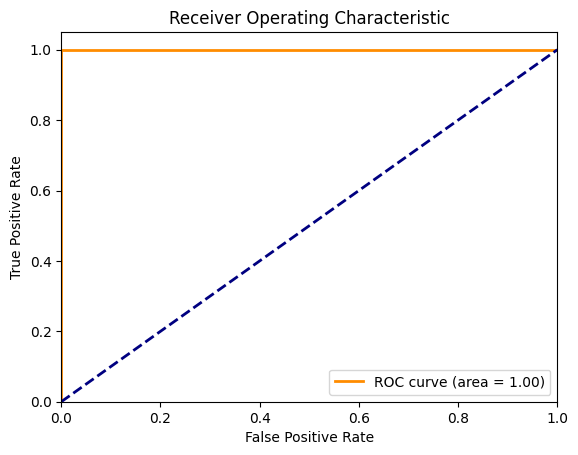

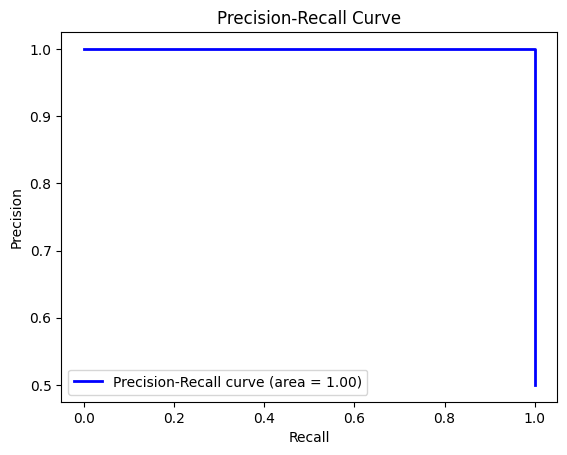

<Figure size 640x480 with 0 Axes>

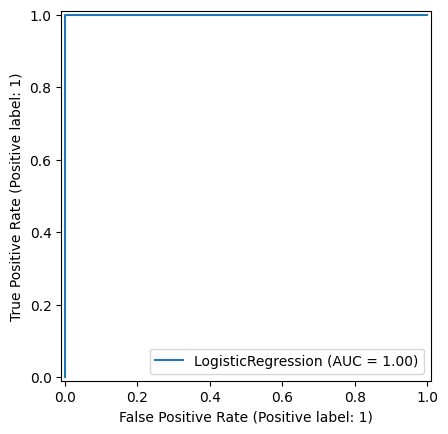

<Figure size 640x480 with 0 Axes>

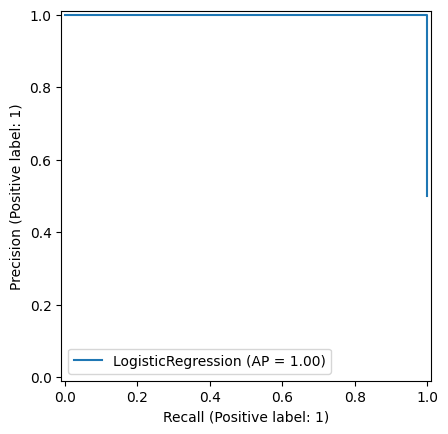

In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Sample data
data = {
    'credit_score': [700, 750, 650, 800, 720, 710, 730, 740, 760, 770],
    'income': [50000, 60000, 45000, 70000, 55000, 52000, 58000, 62000, 65000, 68000],
    'employment_status': ['employed', 'unemployed', 'employed', 'employed', 'unemployed', 'employed', 'unemployed', 'employed', 'employed', 'unemployed'],
    'default': [0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
}
df = pd.DataFrame(data)

# Convert categorical variable to dummy/indicator variables
df['employment_status'] = df['employment_status'].astype('category')
df = pd.get_dummies(df, columns=['employment_status'], drop_first=True)

# Independent variables
X = df[['credit_score', 'income', 'employment_status_unemployed']]

# Dependent variable
y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Logistic Regression model with Elastic Net regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Alternatively, using RocCurveDisplay and PrecisionRecallDisplay for a more streamlined approach
plt.figure()
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()

plt.figure()
PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
plt.show()
